In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
#creating model for training and predicting
class OrdinaryLeastSquareExact:
    
    #find the betas that make the model fit as well as possible
    def fit(self, X, y):
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        self.outputs = y
        
        X = self.data
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
        
    #compute predictions for any input dataset
    def predict(self, X):
        yPredicted = np.empty([X.shape[0], 1])
        
        X = np.hstack((np.ones([X.shape[0],1]), X))

        for row in range(X.shape[0]):
            yPredicted[row] = self.beta @ X[row,]
            
        return yPredicted

Problem 1.a: Fitting the least squares line 

In [3]:
#Data Munipulation
data = pd.read_csv("Temperature_Data.csv", sep = ',').to_numpy()
df = pd.DataFrame({'Date':data[:,0],
                  'Temperature':data[:,1]})
strformat = '%Y-%m-%d'
pd.to_datetime(df.Temperature, yearfirst = True)
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df

,Date,Temperature,Year,Month,Day
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,2
2,1981-01-03,18.8,1981,1,3
3,1981-01-04,14.6,1981,1,4
4,1981-01-05,15.8,1981,1,5
...,...,...,...,...,...
3645,1990-12-27,14,1990,12,27
3646,1990-12-28,13.6,1990,12,28
3647,1990-12-29,13.5,1990,12,29
3648,1990-12-30,15.7,1990,12,30


In [4]:
X = df.drop(columns=['Date','Temperature']).to_numpy()
y = df['Temperature'].to_numpy()

(TrainX, testX, Trainy, testy) = train_test_split(X, y, test_size = .25, random_state = 1)

model = OrdinaryLeastSquareExact()

model.fit(TrainX, Trainy)

trainPredictions = model.predict(TrainX)

print('The r^2 score is', r2_score(Trainy, trainPredictions))
print(model.beta)

The r^2 score is 0.07364667072978137
[-66.49943510532911 0.04031500057710279 -0.3154143402550784
 -0.02087928833316469]


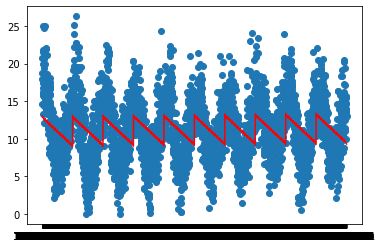

In [5]:
#plotting 

parameters = model.beta
plt.scatter(df.Date, y, label = 'Training Data')

B = model.beta
yModel = B[0] + B[1]*X[:,0] + B[2]*X[:,1] + B[3]*X[:,2]

plt.plot(df.Date, yModel,'r')

Problem 1.b: LBF expansion